In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import re
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graph-response/calculated_dataset.xlsx


## Loading Excel to Pandas

In [2]:
xlsx_file = "/kaggle/input/graph-response/calculated_dataset.xlsx"
xlsx_data = pd.read_excel(xlsx_file, sheet_name=None, header=0)
combined_df = xlsx_data['Combined']
m3_df = xlsx_data['M3']
oporajita_df = xlsx_data['Oporajita']
design_df = xlsx_data['Design']


## Average Sentiment Scores of participants

In [3]:
sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
def avg_sentiment_participant_dataframe(df):
    df_grouped = df.groupby('Participant').agg({
        'Group': 'first',
        'Description': lambda x: ' '.join(x),  # Concatenate descriptions
        'Sentiment_Positive': 'mean',
        'Sentiment_Neutral': 'mean',
        'Sentiment_Negative': 'mean'
    }).reset_index()

    # Define a function to extract the numeric part from the participant string
    def extract_numeric_part(participant):
        numeric_part = re.findall(r'\d+', participant)
        if numeric_part:
            return int(numeric_part[0])
        else:
            return 0

    # Sort the participants based on the extracted numeric part
    sorted_participants = sorted(df_grouped['Participant'], key=extract_numeric_part)

    # Reorder the dataframe based on the sorted participants
    df_grouped['Participant'] = pd.Categorical(df_grouped['Participant'], categories=sorted_participants, ordered=True)
    df_grouped = df_grouped.sort_values('Participant')

    return df_grouped


avg_combined_df = avg_sentiment_participant_dataframe(combined_df)
avg_m3_df = avg_sentiment_participant_dataframe(m3_df)
avg_oporajita_df = avg_sentiment_participant_dataframe(oporajita_df)
avg_design_df = avg_sentiment_participant_dataframe(design_df)

# avg_combined_df 
# avg_m3_df 
# avg_oporajita_df 
# avg_design_df 


## Graphing Sentiment Scores Per Participant

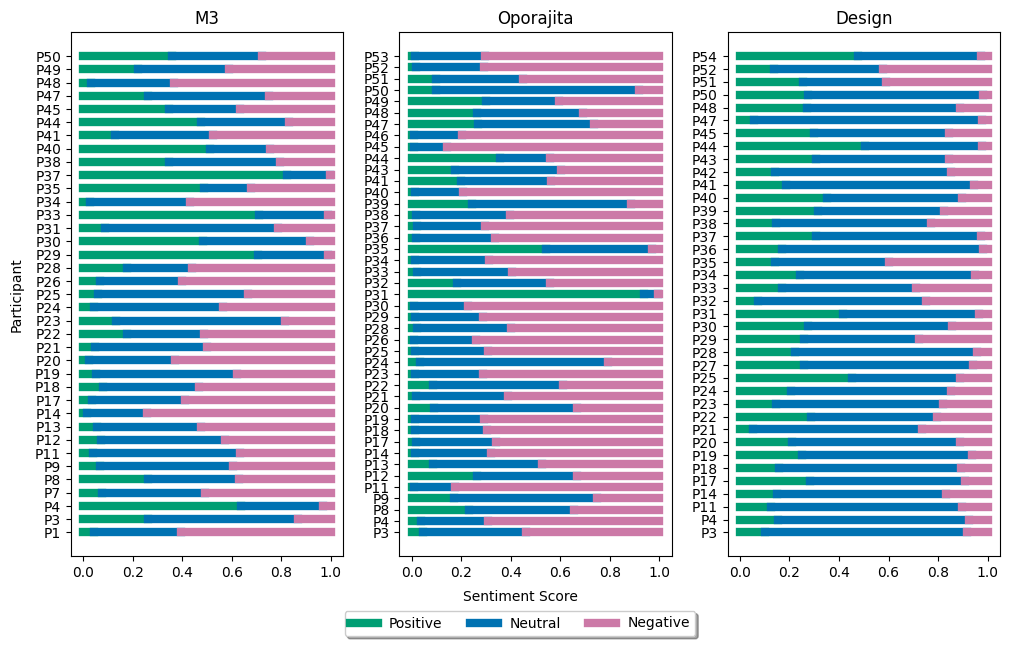

Sentiment Analysis for each Participant


In [4]:
def plot_thin_stacked_bar_subplot(df, title, ax, legend=False):
    # Stacked bar chart
    # Create an array of y-coordinates for each participant
    y = np.arange(len(df))

    # Define width for the bars
    bar_width = 1.5

    # Iterate through each row in the DataFrame
    for i, row in df.iterrows():
        participant = row['Participant']
        ax.plot([0, row['Sentiment_Positive']], [y[i], y[i]], color='#009E73', linewidth=4*bar_width, label='Positive' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'], row['Sentiment_Positive'] + row['Sentiment_Neutral']], [y[i], y[i]], color='#0072B2', linewidth=4*bar_width, label='Neutral' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'] + row['Sentiment_Neutral'], row['Sentiment_Positive'] + row['Sentiment_Neutral'] + row['Sentiment_Negative']], [y[i], y[i]], color='#CC79A7', linewidth=4*bar_width, label='Negative' if i == 0 else None)
    ax.set_title(title)
    ax.set_yticks(y)
    ax.set_yticklabels(df['Participant']) 

    
custom_tick_labels = ['Participant A', 'Participant B', 'Participant C']    
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

# Plot each DataFrame on a separate subplot
plot_thin_stacked_bar_subplot(avg_m3_df, 'M3', axes[0])
plot_thin_stacked_bar_subplot(avg_oporajita_df, 'Oporajita', axes[1])
plot_thin_stacked_bar_subplot(avg_design_df, 'Design', axes[2], legend=True)


# Set common xlabel and ylabel for the entire figure
fig.text(0.5, -0.01, 'Sentiment Score', ha='center')
fig.text(-0.01, 0.5, 'Participant', va='center', rotation='vertical')
# Create a legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08), shadow=True, ncol=3)

plt.tight_layout()
plt.show()
print('Sentiment Analysis for each Participant')


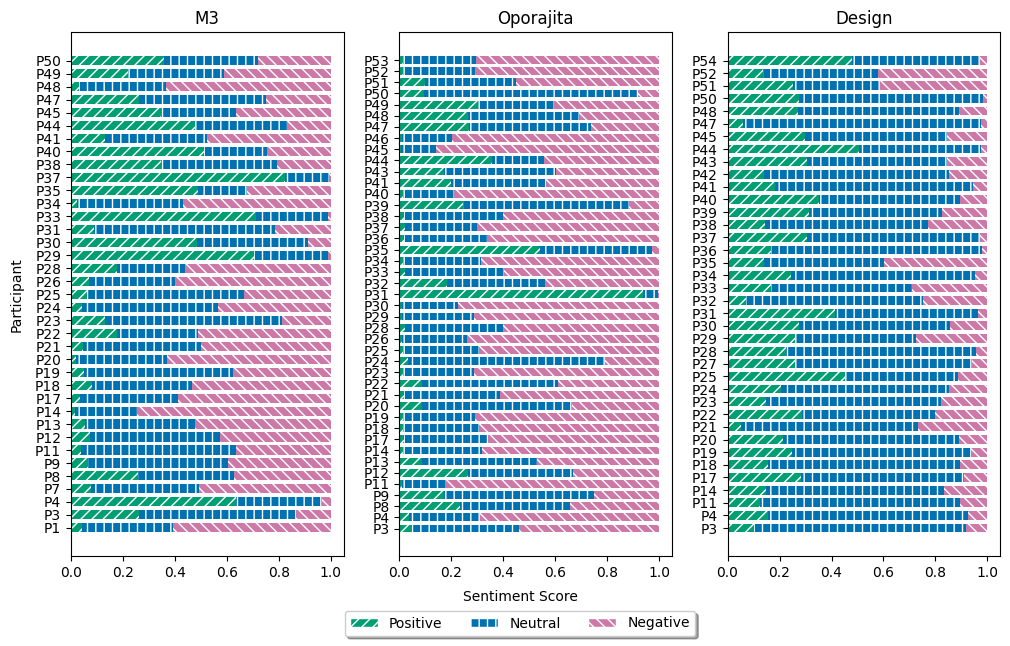

Sentiment Analysis for each Participant


In [5]:
def plot_thin_stacked_bar_subplot(df, title, ax, legend=False):
    # Define width for the bars
    bar_width = 0.7

    # Positions of the bars on the y-axis
    y = np.arange(len(df))

    # Stacked bar chart without hatches
    for i, row in df.iterrows():
        ax.barh(y[i], row['Sentiment_Positive'], color='#009E73', edgecolor='none', height=bar_width, label='Positive' if i == 0 else None)
        ax.barh(y[i], row['Sentiment_Neutral'], left=row['Sentiment_Positive'], color='#0072B2', edgecolor='none', height=bar_width, label='Neutral' if i == 0 else None)
        ax.barh(y[i], row['Sentiment_Negative'], left=row['Sentiment_Positive'] + row['Sentiment_Neutral'], color='#CC79A7', edgecolor='none', height=bar_width, label='Negative' if i == 0 else None)
    
    # Stacked bar chart with white hatches
    for i, row in df.iterrows():
        ax.barh(y[i], row['Sentiment_Positive'], color='none', edgecolor='white', height=bar_width, hatch='///', linewidth=0)
        ax.barh(y[i], row['Sentiment_Neutral'], left=row['Sentiment_Positive'], color='none', edgecolor='white', height=bar_width, hatch='||', linewidth=0)
        ax.barh(y[i], row['Sentiment_Negative'], left=row['Sentiment_Positive'] + row['Sentiment_Neutral'], color='none', edgecolor='white', height=bar_width, hatch='\\\\\\', linewidth=0)

    ax.set_title(title)
    ax.set_yticks(y)
    ax.set_yticklabels(df['Participant'])


# Create custom legend handles
legend_handles = [
    Patch(facecolor='#009E73', edgecolor='white', label='Positive', hatch='///'),
    Patch(facecolor='#0072B2', edgecolor='white', label='Neutral', hatch='||'),
    Patch(facecolor='#CC79A7', edgecolor='white', label='Negative', hatch='\\\\\\')
]
custom_tick_labels = ['Participant A', 'Participant B', 'Participant C']    
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

# Plot each DataFrame on a separate subplot
plot_thin_stacked_bar_subplot(avg_m3_df, 'M3', axes[0])
plot_thin_stacked_bar_subplot(avg_oporajita_df, 'Oporajita', axes[1])
plot_thin_stacked_bar_subplot(avg_design_df, 'Design', axes[2], legend=True)


# Set common xlabel and ylabel for the entire figure
fig.text(0.5, -0.01, 'Sentiment Score', ha='center')
fig.text(-0.01, 0.5, 'Participant', va='center', rotation='vertical')
# Create a legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.08), shadow=True, ncol=3)


plt.tight_layout()
plt.show()
print('Sentiment Analysis for each Participant')


## Average Sentiment Scores for Groups

In [6]:
def avg_sentiment_group_dataframe(df):
    df_grouped = df.groupby('Group').agg({
        'Sentiment_Positive': 'mean',
        'Sentiment_Neutral': 'mean',
        'Sentiment_Negative': 'mean'
    }).reset_index()
    return df_grouped
# avg_sentiment_group_dataframe(combined_df)
# avg_sentiment_group_dataframe(oporajita_df)
# avg_sentiment_group_dataframe(design_df)



## Graphing Sentiment Scores Per Group

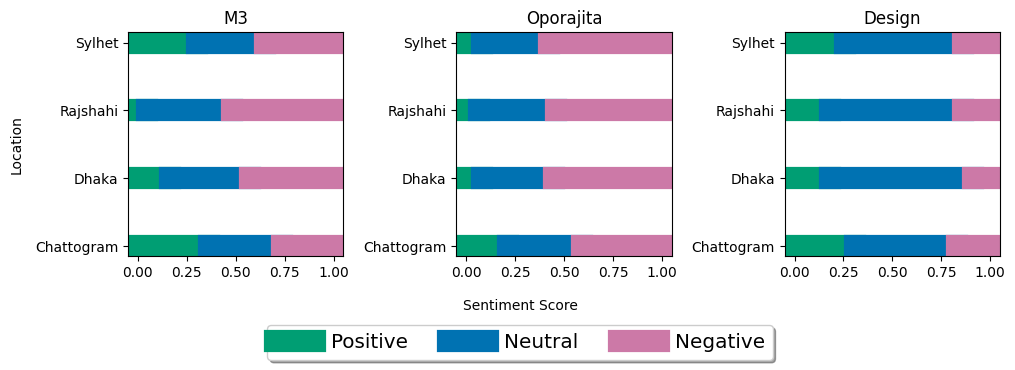

Sentiment Analysis for each Locations


In [7]:
sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
def plot_thin_stacked_bar_subplot(df, title, ax, legend=False):
    # Stacked bar chart
    # Create an array of y-coordinates for each participant
    y = np.arange(len(df))

    # Define width for the bars
    bar_width = 4

    # Iterate through each row in the DataFrame
    for i, row in df.iterrows():
        participant = row['Group']
        ax.plot([0, row['Sentiment_Positive']], [y[i], y[i]], color='#009E73', linewidth=4*bar_width, label='Positive' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'], row['Sentiment_Positive'] + row['Sentiment_Neutral']], [y[i], y[i]], color='#0072B2', linewidth=4*bar_width, label='Neutral' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'] + row['Sentiment_Neutral'], row['Sentiment_Positive'] + row['Sentiment_Neutral'] + row['Sentiment_Negative']], [y[i], y[i]], color='#CC79A7', linewidth=4*bar_width, label='Negative' if i == 0 else None)
    ax.set_title(title)
    ax.set_yticks(y)
    ax.set_yticklabels(custom_tick_labels) 

custom_tick_labels = ['Chattogram','Dhaka','Rajshahi','Sylhet' ]
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Plot each DataFrame on a separate subplot
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(m3_df), 'M3', axes[0])
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(oporajita_df), 'Oporajita', axes[1])
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(design_df), 'Design', axes[2], legend=True)


# Set common xlabel and ylabel for the entire figure
fig.text(0.5, -0.05, 'Sentiment Score', ha='center')
fig.text(-0.01, 0.5, 'Location', va='center', rotation='vertical')
# Create a legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=3, fontsize='x-large')

plt.tight_layout()
plt.show()
print('Sentiment Analysis for each Locations')

sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']

def avg_sentiment_group_dataframe(df):
    df_grouped = df.groupby('Group').agg({
        'Sentiment_Positive': 'mean',
        'Sentiment_Neutral': 'mean',
        'Sentiment_Negative': 'mean'
    }).reset_index()
    return df_grouped


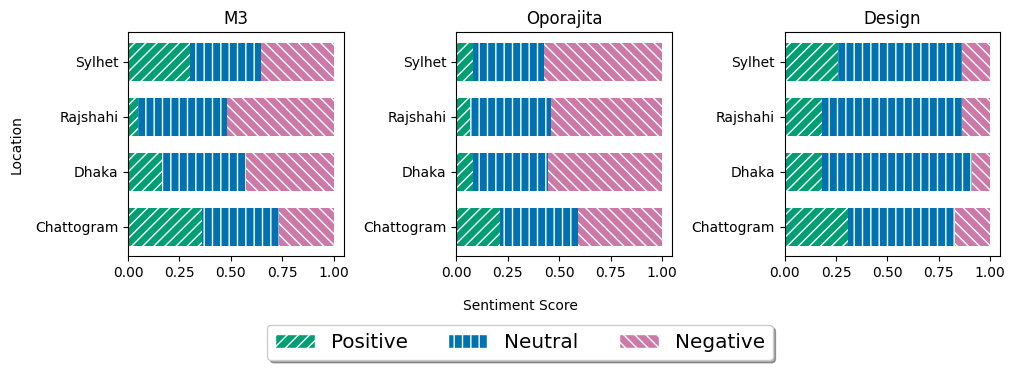

Sentiment Analysis for each Locations


In [8]:
sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
def plot_thin_stacked_bar_subplot(df, title, ax, legend=False):
    # Define width for the bars
    bar_width = 0.7

    # Positions of the bars on the y-axis
    y = np.arange(len(df))

    # Stacked bar chart without hatches
    for i, row in df.iterrows():
        ax.barh(y[i], row['Sentiment_Positive'], color='#009E73', edgecolor='none', height=bar_width, label='Positive' if i == 0 else None)
        ax.barh(y[i], row['Sentiment_Neutral'], left=row['Sentiment_Positive'], color='#0072B2', edgecolor='none', height=bar_width, label='Neutral' if i == 0 else None)
        ax.barh(y[i], row['Sentiment_Negative'], left=row['Sentiment_Positive'] + row['Sentiment_Neutral'], color='#CC79A7', edgecolor='none', height=bar_width, label='Negative' if i == 0 else None)
    
    # Stacked bar chart with white hatches
    for i, row in df.iterrows():
        ax.barh(y[i], row['Sentiment_Positive'], color='none', edgecolor='white', height=bar_width, hatch='///', linewidth=0)
        ax.barh(y[i], row['Sentiment_Neutral'], left=row['Sentiment_Positive'], color='none', edgecolor='white', height=bar_width, hatch='||', linewidth=0)
        ax.barh(y[i], row['Sentiment_Negative'], left=row['Sentiment_Positive'] + row['Sentiment_Neutral'], color='none', edgecolor='white', height=bar_width, hatch='\\\\\\', linewidth=0)

    ax.set_title(title)
    ax.set_yticks(y)
    ax.set_yticklabels(custom_tick_labels) 

custom_tick_labels = ['Chattogram','Dhaka','Rajshahi','Sylhet' ]


# Create custom legend handles
legend_handles = [
    Patch(facecolor='#009E73', edgecolor='white', label='Positive', hatch='///'),
    Patch(facecolor='#0072B2', edgecolor='white', label='Neutral', hatch='||'),
    Patch(facecolor='#CC79A7', edgecolor='white', label='Negative', hatch='\\\\\\')
]
custom_tick_labels = ['Chattogram','Dhaka','Rajshahi','Sylhet' ]
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Plot each DataFrame on a separate subplot
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(m3_df), 'M3', axes[0])
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(oporajita_df), 'Oporajita', axes[1])
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(design_df), 'Design', axes[2], legend=True)


# Set common xlabel and ylabel for the entire figure
fig.text(0.5, -0.05, 'Sentiment Score', ha='center')
fig.text(-0.01, 0.5, 'Location', va='center', rotation='vertical')
# Create a legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=3, fontsize='x-large')

plt.tight_layout()
plt.show()
print('Sentiment Analysis for each Locations')

sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']

def avg_sentiment_group_dataframe(df):
    df_grouped = df.groupby('Group').agg({
        'Sentiment_Positive': 'mean',
        'Sentiment_Neutral': 'mean',
        'Sentiment_Negative': 'mean'
    }).reset_index()
    return df_grouped


## Confusion Matrix M3 VS Oporajita

35
[[ 2  2  4]
 [ 0  4  8]
 [ 0  4 11]]


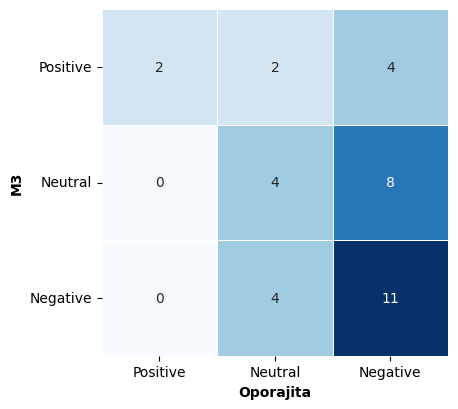

Confusion Matrix M3 VS Oporajita


In [9]:
# Convert to DataFrames
df1 = avg_m3_df
df2 = avg_oporajita_df

# Merge DataFrames based on 'participant'
common_participants = pd.merge(df1, df2, on='Participant', how='inner')
print(len(common_participants))

# Get true and predicted labels
true_labels = common_participants[['Sentiment_Positive_x', 'Sentiment_Neutral_x', 'Sentiment_Negative_x']].values
predicted_labels = common_participants[['Sentiment_Positive_y', 'Sentiment_Neutral_y', 'Sentiment_Negative_y']].values

# Compute confusion matrix
cm = confusion_matrix(np.argmax(true_labels, axis=1), np.argmax(predicted_labels, axis=1))
print(cm)

plt.figure(figsize=(4, 4))
classes = ['Positive', 'Neutral', 'Negative']
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=.5, cbar=False)

plt.tight_layout()
plt.ylabel('M3', fontweight='bold')
plt.xlabel('Oporajita', fontweight='bold')
plt.gca().set_xticks(np.arange(len(classes)) + 0.5, minor=False)
plt.gca().set_yticks(np.arange(len(classes)) + 0.5, minor=False)
plt.gca().set_xticklabels(classes, rotation=0)
plt.gca().set_yticklabels(classes, rotation=0)
plt.show()
print('Confusion Matrix M3 VS Oporajita')

## Summary Sentiment

In [10]:
def summary_sentiment(df):
    sentiments = ['Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
    summary_data = {}  # Initialize an empty dictionary to store summary data for all sentiments
    for sentiment in sentiments:
        # Calculate min, avg, max for current sentiment
        summary_data[sentiment] = df[sentiment].agg(['min', 'mean', 'max'])
    return summary_data

summary_m3 = summary_sentiment(avg_m3_df)
summary_oporajita = summary_sentiment(avg_oporajita_df)
summary_design = summary_sentiment(avg_design_df)

print(summary_m3)
print(summary_oporajita)
print(summary_design)

{'Sentiment_Positive': min     0.015500
mean    0.227718
max     0.823500
Name: Sentiment_Positive, dtype: float64, 'Sentiment_Neutral': min     0.171300
mean    0.404164
max     0.696800
Name: Sentiment_Neutral, dtype: float64, 'Sentiment_Negative': min     0.005100
mean    0.368109
max     0.744000
Name: Sentiment_Negative, dtype: float64}
{'Sentiment_Positive': min     0.008500
mean    0.117502
max     0.939300
Name: Sentiment_Positive, dtype: float64, 'Sentiment_Neutral': min     0.056000
mean    0.358391
max     0.819740
Name: Sentiment_Neutral, dtype: float64, 'Sentiment_Negative': min     0.004800
mean    0.524101
max     0.858200
Name: Sentiment_Negative, dtype: float64}
{'Sentiment_Positive': min     0.051767
mean    0.232048
max     0.504560
Name: Sentiment_Positive, dtype: float64, 'Sentiment_Neutral': min     0.334717
mean    0.626896
max     0.918600
Name: Sentiment_Neutral, dtype: float64, 'Sentiment_Negative': min     0.018950
mean    0.141053
max     0.422450
Name: Sent

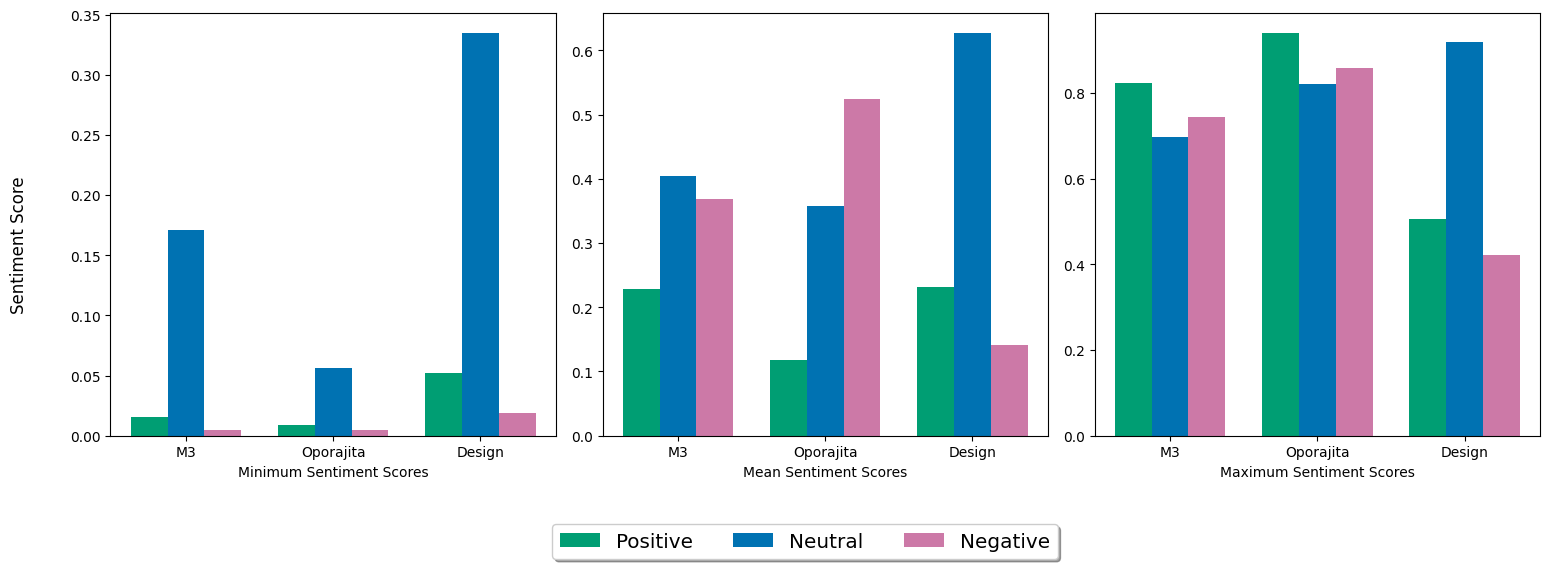

Min, Mean and Max Sentiment Scores
Minimum Sentiment Scores:
+-----------+------------+-----------+------------+
|           |   Positive |   Neutral |   Negative |
+===========+============+===========+============+
| M3        |  0.0155    |  0.1713   |    0.0051  |
+-----------+------------+-----------+------------+
| Oporajita |  0.0085    |  0.056    |    0.0048  |
+-----------+------------+-----------+------------+
| Design    |  0.0517667 |  0.334717 |    0.01895 |
+-----------+------------+-----------+------------+

Mean Sentiment Scores:
+-----------+------------+-----------+------------+
|           |   Positive |   Neutral |   Negative |
+===========+============+===========+============+
| M3        |   0.227718 |  0.404164 |   0.368109 |
+-----------+------------+-----------+------------+
| Oporajita |   0.117502 |  0.358391 |   0.524101 |
+-----------+------------+-----------+------------+
| Design    |   0.232048 |  0.626896 |   0.141053 |
+-----------+------------+-----

In [11]:
def plot_sentiment_scores(ax, data, title):
    labels = ['M3', 'Oporajita', 'Design']
    x = np.arange(len(labels))
    width = 0.25

    for i, (label, color) in enumerate(zip(['Positive', 'Neutral', 'Negative'], ['#009E73', '#0072B2', '#CC79A7'])):
        ax.bar(x + i*width - width, data[label], width, label=label, color=color)
        ax.set_xlabel(title)
#     ax.set_ylabel('Sentiment Score')
#     ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

# Data
min_data = {
    'Positive': [summary_m3['Sentiment_Positive']['min'], 
                 summary_oporajita['Sentiment_Positive']['min'], 
                 summary_design['Sentiment_Positive']['min']],
    'Neutral': [summary_m3['Sentiment_Neutral']['min'], 
                summary_oporajita['Sentiment_Neutral']['min'], 
                summary_design['Sentiment_Neutral']['min']],
    'Negative': [summary_m3['Sentiment_Negative']['min'], 
                 summary_oporajita['Sentiment_Negative']['min'], 
                 summary_design['Sentiment_Negative']['min']]
}

mean_data = {
    'Positive': [summary_m3['Sentiment_Positive']['mean'], 
                 summary_oporajita['Sentiment_Positive']['mean'], 
                 summary_design['Sentiment_Positive']['mean']],
    'Neutral': [summary_m3['Sentiment_Neutral']['mean'], 
                summary_oporajita['Sentiment_Neutral']['mean'], 
                summary_design['Sentiment_Neutral']['mean']],
    'Negative': [summary_m3['Sentiment_Negative']['mean'], 
                 summary_oporajita['Sentiment_Negative']['mean'], 
                 summary_design['Sentiment_Negative']['mean']]
}

max_data = {
    'Positive': [summary_m3['Sentiment_Positive']['max'], 
                 summary_oporajita['Sentiment_Positive']['max'], 
                 summary_design['Sentiment_Positive']['max']],
    'Neutral': [summary_m3['Sentiment_Neutral']['max'], 
                summary_oporajita['Sentiment_Neutral']['max'], 
                summary_design['Sentiment_Neutral']['max']],
    'Negative': [summary_m3['Sentiment_Negative']['max'], 
                 summary_oporajita['Sentiment_Negative']['max'], 
                 summary_design['Sentiment_Negative']['max']]
}

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='x-large')

# Set common xlabel and ylabel for the entire figure
#fig.text(0.5, -0.05, 'Sentiment Score', ha='center')
fig.text(-0.03, 0.5, 'Sentiment Score', va='center', rotation='vertical', fontsize='large')
# Plotting minimum sentiment scores
plot_sentiment_scores(axs[0], min_data, 'Minimum Sentiment Scores')

# Plotting mean sentiment scores
plot_sentiment_scores(axs[1], mean_data, 'Mean Sentiment Scores')

# Plotting maximum sentiment scores
plot_sentiment_scores(axs[2], max_data, 'Maximum Sentiment Scores')

plt.tight_layout()
plt.show()
print('Min, Mean and Max Sentiment Scores')



# Custom row headers
row_headers = ['M3', 'Oporajita', 'Design']

# Print minimum sentiment scores
print("Minimum Sentiment Scores:")
print(tabulate(min_data, headers='keys', showindex=row_headers, tablefmt='grid'))

# Print mean sentiment scores
print("\nMean Sentiment Scores:")
print(tabulate(mean_data, headers='keys', showindex=row_headers, tablefmt='grid'))

# Print maximum sentiment scores
print("\nMaximum Sentiment Scores:")
print(tabulate(max_data, headers='keys', showindex=row_headers, tablefmt='grid'))



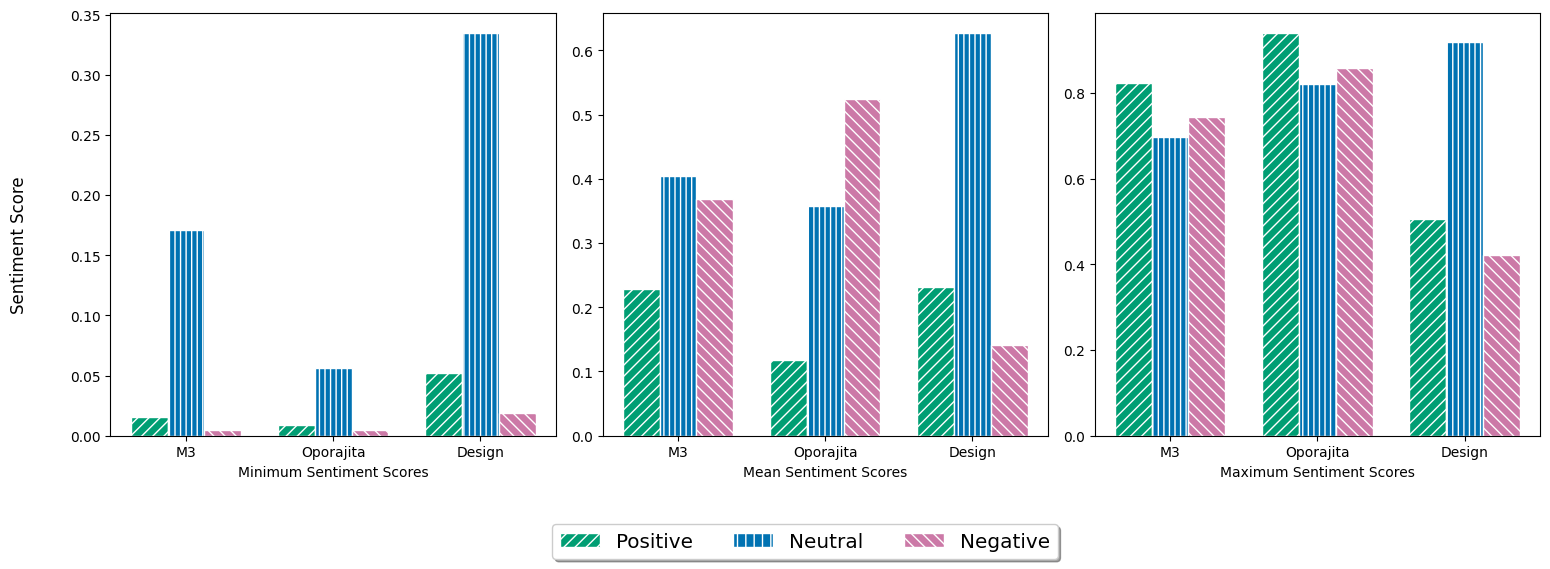

Min, Mean and Max Sentiment Scores
Minimum Sentiment Scores:
+-----------+------------+-----------+------------+
|           |   Positive |   Neutral |   Negative |
+===========+============+===========+============+
| M3        |  0.0155    |  0.1713   |    0.0051  |
+-----------+------------+-----------+------------+
| Oporajita |  0.0085    |  0.056    |    0.0048  |
+-----------+------------+-----------+------------+
| Design    |  0.0517667 |  0.334717 |    0.01895 |
+-----------+------------+-----------+------------+

Mean Sentiment Scores:
+-----------+------------+-----------+------------+
|           |   Positive |   Neutral |   Negative |
+===========+============+===========+============+
| M3        |   0.227718 |  0.404164 |   0.368109 |
+-----------+------------+-----------+------------+
| Oporajita |   0.117502 |  0.358391 |   0.524101 |
+-----------+------------+-----------+------------+
| Design    |   0.232048 |  0.626896 |   0.141053 |
+-----------+------------+-----

In [12]:
def plot_sentiment_scores(ax, data, title):
    labels = ['M3', 'Oporajita', 'Design']
    x = np.arange(len(labels))
    width = 0.25

    for i, (label, color) in enumerate(zip(['Positive', 'Neutral', 'Negative'], ['#009E73', '#0072B2', '#CC79A7'])):
        bars = ax.bar(x + i*width - width, data[label], width, label=label, color=color, edgecolor='white')
        # Add white hatches to the bars
        for bar in bars:
            bar.set_hatch('///' if label == 'Positive' else '|||' if label == 'Neutral' else '\\\\\\')

    ax.set_xlabel(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

# Data
min_data = {
    'Positive': [summary_m3['Sentiment_Positive']['min'], 
                 summary_oporajita['Sentiment_Positive']['min'], 
                 summary_design['Sentiment_Positive']['min']],
    'Neutral': [summary_m3['Sentiment_Neutral']['min'], 
                summary_oporajita['Sentiment_Neutral']['min'], 
                summary_design['Sentiment_Neutral']['min']],
    'Negative': [summary_m3['Sentiment_Negative']['min'], 
                 summary_oporajita['Sentiment_Negative']['min'], 
                 summary_design['Sentiment_Negative']['min']]
}

mean_data = {
    'Positive': [summary_m3['Sentiment_Positive']['mean'], 
                 summary_oporajita['Sentiment_Positive']['mean'], 
                 summary_design['Sentiment_Positive']['mean']],
    'Neutral': [summary_m3['Sentiment_Neutral']['mean'], 
                summary_oporajita['Sentiment_Neutral']['mean'], 
                summary_design['Sentiment_Neutral']['mean']],
    'Negative': [summary_m3['Sentiment_Negative']['mean'], 
                 summary_oporajita['Sentiment_Negative']['mean'], 
                 summary_design['Sentiment_Negative']['mean']]
}

max_data = {
    'Positive': [summary_m3['Sentiment_Positive']['max'], 
                 summary_oporajita['Sentiment_Positive']['max'], 
                 summary_design['Sentiment_Positive']['max']],
    'Neutral': [summary_m3['Sentiment_Neutral']['max'], 
                summary_oporajita['Sentiment_Neutral']['max'], 
                summary_design['Sentiment_Neutral']['max']],
    'Negative': [summary_m3['Sentiment_Negative']['max'], 
                 summary_oporajita['Sentiment_Negative']['max'], 
                 summary_design['Sentiment_Negative']['max']]
}

# Create custom legend handles
legend_handles = [
    Patch(facecolor='#009E73', edgecolor='white', label='Positive', hatch='///'),
    Patch(facecolor='#0072B2', edgecolor='white', label='Neutral', hatch='||'),
    Patch(facecolor='#CC79A7', edgecolor='white', label='Negative', hatch='\\\\\\')
]

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='x-large')

# Set common xlabel and ylabel for the entire figure
#fig.text(0.5, -0.05, 'Sentiment Score', ha='center')
fig.text(-0.03, 0.5, 'Sentiment Score', va='center', rotation='vertical', fontsize='large')
# Plotting minimum sentiment scores
plot_sentiment_scores(axs[0], min_data, 'Minimum Sentiment Scores')

# Plotting mean sentiment scores
plot_sentiment_scores(axs[1], mean_data, 'Mean Sentiment Scores')

# Plotting maximum sentiment scores
plot_sentiment_scores(axs[2], max_data, 'Maximum Sentiment Scores')

plt.tight_layout()
plt.show()
print('Min, Mean and Max Sentiment Scores')



# Custom row headers
row_headers = ['M3', 'Oporajita', 'Design']

# Print minimum sentiment scores
print("Minimum Sentiment Scores:")
print(tabulate(min_data, headers='keys', showindex=row_headers, tablefmt='grid'))

# Print mean sentiment scores
print("\nMean Sentiment Scores:")
print(tabulate(mean_data, headers='keys', showindex=row_headers, tablefmt='grid'))

# Print maximum sentiment scores
print("\nMaximum Sentiment Scores:")
print(tabulate(max_data, headers='keys', showindex=row_headers, tablefmt='grid'))

